In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import binom
from scipy.stats import hypergeom
from scipy.stats import poisson

#Q37

In [11]:
df = pd.DataFrame({'Vacant Units':[0,1,2,3],'P(X)':[0.1,0.2,0.3,0.4]})
df['X.P(X)'] = (df['Vacant Units']*df['P(X)'])
mean = sum(df['X.P(X)'])
df['(X-E(X))**2'] = (df['Vacant Units'] - mean)**2
df['(X-E(X))**2.P(X)'] = df['(X-E(X))**2']*df['P(X)']
std = sum(df['(X-E(X))**2.P(X)'])
print(f'Mean:{mean}')
print(f'Standard deviation:',np.sqrt(std))
print(df)

Mean:2.0
Standard deviation: 1.0
   Vacant Units  P(X)  X.P(X)  (X-E(X))**2  (X-E(X))**2.P(X)
0             0   0.1     0.0          4.0               0.4
1             1   0.2     0.2          1.0               0.2
2             2   0.3     0.6          0.0               0.0
3             3   0.4     1.2          1.0               0.4


#Q38

In [12]:
# Define the data
data = {'Investments': [1000,2000,5000], 'P(X)': [0.25,0.6,0.15]}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate X.P(X)
df['X.P(X)'] = df['Investments'] * df['P(X)']

# Calculate mean and standard deviation
mean = np.sum(df['X.P(X)'])
std = np.sqrt(np.sum((df['Investments'] - mean) ** 2 * df['P(X)']))

# Print mean and standard deviation
print(f"Mean: {mean}")
print(f"Standard deviation: {std}")

# Print the DataFrame
print(df)


Mean: 2200.0
Standard deviation: 1248.9995996796797
   Investments  P(X)  X.P(X)
0         1000  0.25   250.0
1         2000  0.60  1200.0
2         5000  0.15   750.0


#Q39

In [17]:
# Define the data
data = {'Investments': [0,1,2,3,4], 'P(X)': [0.4,0.2,0.2,0.1,0.1]}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate X.P(X)
df['X.P(X)'] = df['Investments'] * df['P(X)']

# Calculate mean and standard deviation
mean = np.sum(df['X.P(X)'])
var = np.sum((df['Investments'] - mean) ** 2 * df['P(X)'])
std = np.sqrt(np.sum((df['Investments'] - mean) ** 2 * df['P(X)']))

# Print mean and standard deviation
print(f"Mean: {mean}")
print(f'Variance: {var}')
print(f"Standard deviation: {std}")
# Print the DataFrame
print(df)


Mean: 1.3000000000000003
Variance: 1.81
Standard deviation: 1.3453624047073711
   Investments  P(X)  X.P(X)
0            0   0.4     0.0
1            1   0.2     0.2
2            2   0.2     0.4
3            3   0.1     0.3
4            4   0.1     0.4


#Q40

In [19]:
# Define the data
data = {'cakes': [12,13,14,15], 'P(X)': [0.25,0.4,0.25,0.1]}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate X.P(X)
df['X.P(X)'] = df['cakes'] * df['P(X)']

# Calculate mean and standard deviation
mean = np.sum(df['X.P(X)'])
var = np.sum((df['cakes'] - mean) ** 2 * df['P(X)'])
std = np.sqrt(np.sum((df['cakes'] - mean) ** 2 * df['P(X)']))

# Print mean and standard deviation
print(f"Mean: {mean}")
print(f'Variance: {var}')
print(f"Standard deviation: {std}")
# Print the DataFrame
print(df)


Mean: 13.2
Variance: 0.8600000000000001
Standard deviation: 0.9273618495495705
   cakes  P(X)  X.P(X)
0     12  0.25     3.0
1     13  0.40     5.2
2     14  0.25     3.5
3     15  0.10     1.5


#Q41

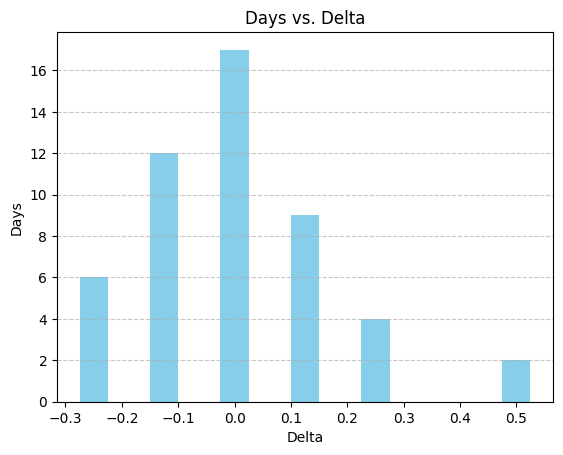

In [27]:

# Create DataFrame
df = pd.DataFrame({'delta': [-0.25, -0.125, 0, 0.125, 0.25, 0.5],
                   'days': [6, 12, 17, 9, 4, 2]})


# Plot bar chart
plt.bar(x=df['delta'], height=df['days'], width=0.05, color='skyblue')
plt.xlabel('Delta')
plt.ylabel('Days')
plt.title('Days vs. Delta')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.show()


#Q42


Mean: 1.0
Variance: 0.9
     k          P(k)        cumsum
0    0  3.486784e-01  6.513216e-01
1    1  3.874205e-01  2.639011e-01
2    2  1.937102e-01  7.019083e-02
3    3  5.739563e-02  1.279520e-02
4    4  1.116026e-02  1.634937e-03
5    5  1.488035e-03  1.469026e-04
6    6  1.377810e-04  9.121600e-06
7    7  8.748000e-06  3.736000e-07
8    8  3.645000e-07  9.100000e-09
9    9  9.000000e-09  1.000005e-10
10  10  1.000000e-10  4.440892e-16


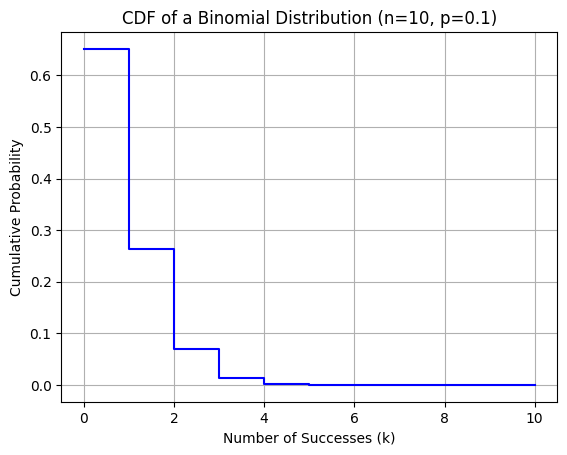

In [35]:
# Parameters
n = 10  # Number of trials
p = 0.1  # Probability of success

# Calculate the first few probabilities
k_values = np.arange(0, n+1)  # Values of k from 0 to 10
probabilities = [binom.pmf(i, n, p) for i in k_values]

mean = n * p
variance = n * p * (1 - p)

print("\nMean:", mean)
print("Variance:", variance)

df = pd.DataFrame({'k':k_values,'P(k)':probabilities})
df['cumsum'] = 1-df['P(k)'].cumsum()
print(df)
# Generate the range of values for the x-axis (number of successes)
x = np.arange(0, n+1)

# Calculate the CDF for each value
cdf = binom.cdf(x, n, p)

# Plot the more than CDF
plt.step(x, df['cumsum'], where='post', color='b')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of a Binomial Distribution (n={}, p={})'.format(n, p))
plt.grid(True)
plt.show()



In [36]:
print('The probability of finding 5 or more defective machines is:',1-binom.cdf(4,n,p))

The probability of finding 5 or more defective machines is: 0.0016349373999999806


#Q43


Mean: 1.25
Variance: 0.9375
   k      P(k)        cumsum
0  0  0.237305  7.626953e-01
1  1  0.395508  3.671875e-01
2  2  0.263672  1.035156e-01
3  3  0.087891  1.562500e-02
4  4  0.014648  9.765625e-04
5  5  0.000977  4.440892e-16


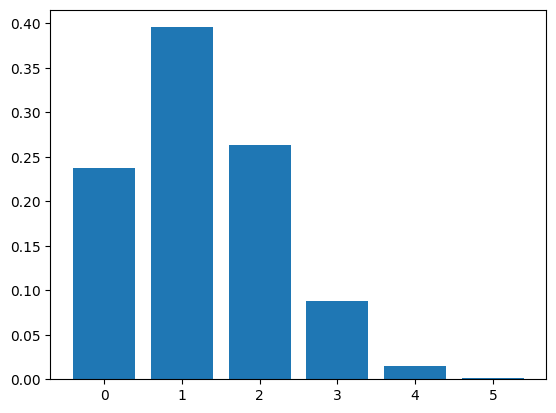

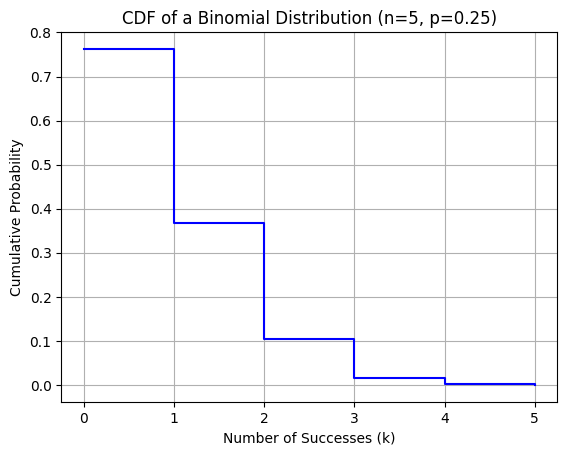

In [38]:
# Parameters
n = 5  # Number of trials
p = 0.25  # Probability of success

# Calculate the first few probabilities
k_values = np.arange(0, n+1)  # Values of k from 0 to 10
probabilities = [binom.pmf(i, n, p) for i in k_values]

mean = n * p
variance = n * p * (1 - p)

print("\nMean:", mean)
print("Variance:", variance)

df = pd.DataFrame({'k':k_values,'P(k)':probabilities})
df['cumsum'] = 1-df['P(k)'].cumsum()
print(df)
# Generate the range of values for the x-axis (number of successes)
x = np.arange(0, n+1)

# Calculate the CDF for each value
cdf = binom.cdf(x, n, p)

plt.bar(df['k'],df['P(k)'])
plt.show()
# Plot the more than CDF
plt.step(x, df['cumsum'], where='post', color='b')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of a Binomial Distribution (n={}, p={})'.format(n, p))
plt.grid(True)
plt.show()



In [39]:
print(f'The probability of getting one or more correct is {1-binom.cdf(0,n,p)} ')

The probability of getting one or more correct is 0.7626953125 


#Q44

x	p(x)
---------------
0	0.00571
1	0.03975
2	0.12181
3	0.21732
4	0.25128
5	0.19827
6	0.10940
7	0.04251
8	0.01154
9	0.00213
10	0.00025
11	0.00002
12	0.00000


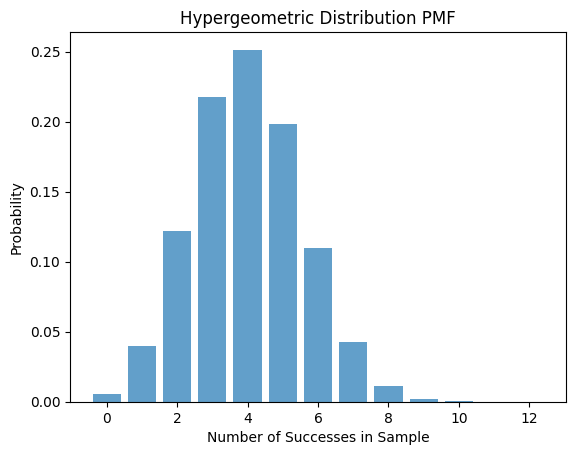

In [43]:
# Parameters
n = 18  # Number of trials
p = 0.5  # Probability of success

# Calculate the first few probabilities
k_values = np.arange(0, n+1)  # Values of k from 0 to 10
probabilities = [binom.pmf(i, n, p) for i in k_values]

mean = n * p
variance = n * p * (1 - p)

print("\nMean:", mean)
print("Variance:", variance)

df = pd.DataFrame({'k':k_values,'P(k)':probabilities})
df['cumsum'] = 1-df['P(k)'].cumsum()
print(df)
# Generate the range of values for the x-axis (number of successes)
x = np.arange(0, n+1)

# Calculate the CDF for each value
cdf = binom.cdf(x, n, p)

plt.bar(df['k'],df['P(k)'])
plt.show()
# Plot the more than CDF
plt.step(x, df['cumsum'], where='post', color='b')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of a Binomial Distribution (n={}, p={})'.format(n, p))
plt.grid(True)
plt.show()



In [42]:
print(f'The probability of having 11 or more boys in the class is {1-binom.cdf(10,n,p)}')
print(f'The probability of having 7 or fewer girls in the class is {binom.cdf(7,n,p)}')


The probability of having 11 or more boys in the class is 0.2403411865234375
The probability of having 7 or fewer girls in the class is 0.2403411865234375


#Q45


Mean: 3.5999999999999996
Variance: 2.5199999999999996
     k          P(k)        cumsum
0    0  1.384129e-02  9.861587e-01
1    1  7.118376e-02  9.149750e-01
2    2  1.677903e-01  7.471847e-01
3    3  2.397004e-01  5.074842e-01
4    4  2.311397e-01  2.763445e-01
5    5  1.584958e-01  1.178487e-01
6    6  7.924790e-02  3.860084e-02
7    7  2.911147e-02  9.489371e-03
8    8  7.797716e-03  1.691655e-03
9    9  1.485279e-03  2.063763e-04
10  10  1.909645e-04  1.541179e-05
11  11  1.488035e-05  5.314410e-07
12  12  5.314410e-07  3.330669e-16


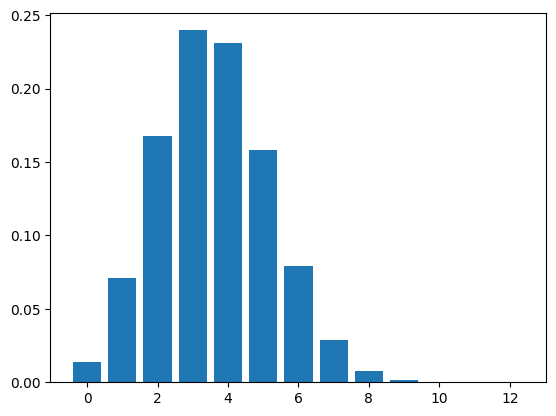

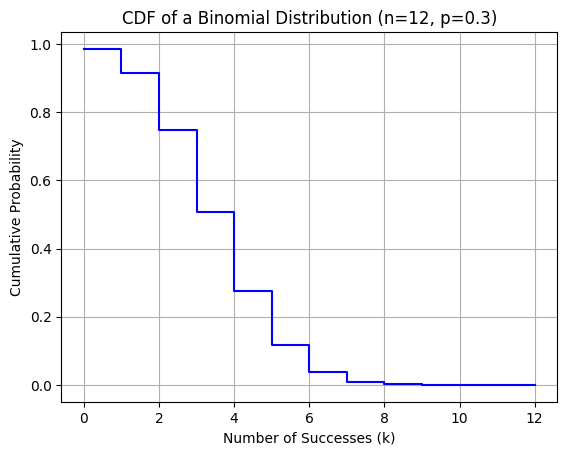

In [45]:
# Parameters
n = 12  # Number of trials
p = 0.3  # Probability of success

# Calculate the first few probabilities
k_values = np.arange(0, n+1)  # Values of k from 0 to 10
probabilities = [binom.pmf(i, n, p) for i in k_values]

mean = n * p
variance = n * p * (1 - p)

print("\nMean:", mean)
print("Variance:", variance)

df = pd.DataFrame({'k':k_values,'P(k)':probabilities})
df['cumsum'] = 1-df['P(k)'].cumsum()
print(df)
# Generate the range of values for the x-axis (number of successes)
x = np.arange(0, n+1)

# Calculate the CDF for each value
cdf = binom.cdf(x, n, p)

plt.bar(df['k'],df['P(k)'])
plt.show()
# Plot the more than CDF
plt.step(x, df['cumsum'], where='post', color='b')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of a Binomial Distribution (n={}, p={})'.format(n, p))
plt.grid(True)
plt.show()



#Q46

   X          P(X)
0  0  6.703200e-01
1  1  2.681280e-01
2  2  5.362560e-02
3  3  7.150080e-03
4  4  7.150080e-04
5  5  5.720064e-05
6  6  3.813376e-06
7  7  2.179072e-07
8  8  1.089536e-08
9  9  4.842383e-10


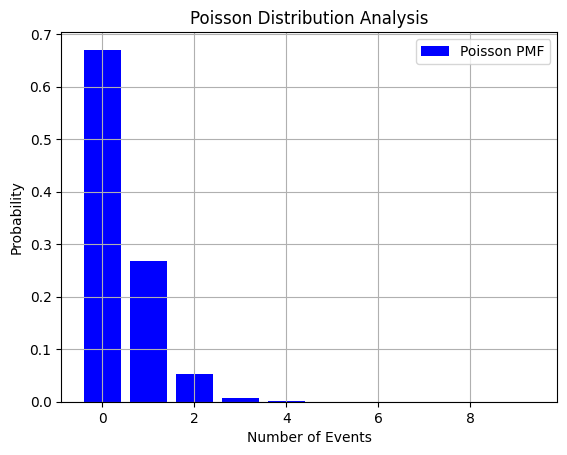

In [46]:

# Set the lambda parameter for the Poisson distribution
lambda_parameter = 0.4

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [50]:
cdf = 1-poisson.cdf(0,lambda_parameter)
print(f'one would expect to see {cdf*1000} defective chasis if 1000 samples are taken based on the lamda parameter.')

one would expect to see 329.67995396436066 defective chasis if 1000 samples are taken based on the lamda parameter.


#Q47

   X          P(X)
0  0  6.065307e-01
1  1  3.032653e-01
2  2  7.581633e-02
3  3  1.263606e-02
4  4  1.579507e-03
5  5  1.579507e-04
6  6  1.316256e-05
7  7  9.401827e-07
8  8  5.876142e-08
9  9  3.264523e-09


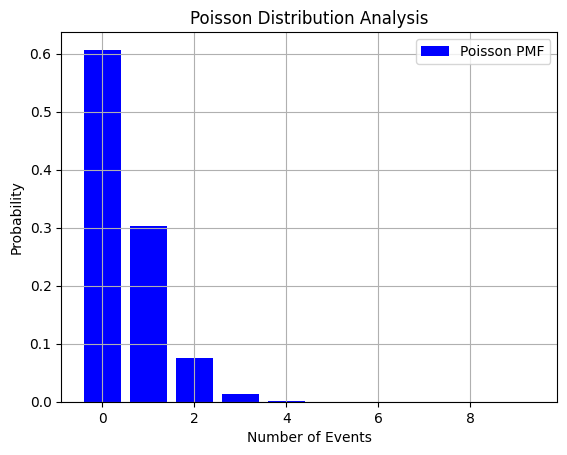

In [51]:

# Set the lambda parameter for the Poisson distribution
lambda_parameter = 0.5

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [56]:
print(f'out of 1000 doors, one would find 0 blemishes in {1000*(poisson.pmf(0,lambda_parameter)):.0f} cars.')
print(f'out of 1000 doors, one would find 2 or more blemishes in {1000*(1-poisson.pmf(1,lambda_parameter)):.0f} cars.')

out of 1000 doors, one would find 0 blemishes in 607 cars.
out of 1000 doors, one would find 2 or more blemishes in 697 cars.


#Q48

   X      P(X)
0  0  0.135335
1  1  0.270671
2  2  0.270671
3  3  0.180447
4  4  0.090224
5  5  0.036089
6  6  0.012030
7  7  0.003437
8  8  0.000859
9  9  0.000191


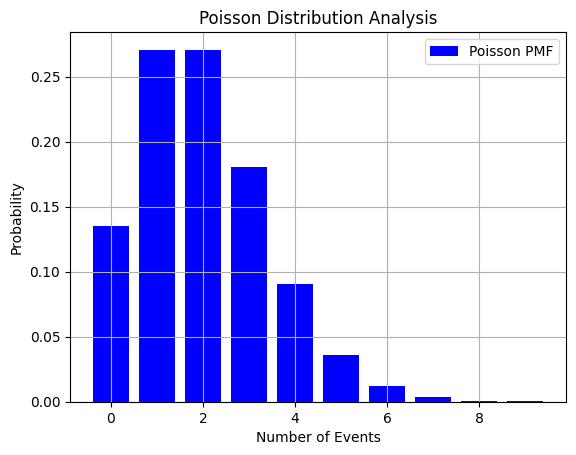

In [57]:

# Set the lambda parameter for the Poisson distribution
lambda_parameter = 2

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [60]:
print(f'the probability of having less than 5 unfilled orders is {poisson.cdf(4,lambda_parameter):.2f}')

the probability of having less than 5 unfilled orders is 0.95


#Q49

   X          P(X)
0  0  8.187308e-01
1  1  1.637462e-01
2  2  1.637462e-02
3  3  1.091641e-03
4  4  5.458205e-05
5  5  2.183282e-06
6  6  7.277607e-08
7  7  2.079316e-09
8  8  5.198290e-11
9  9  1.155176e-12


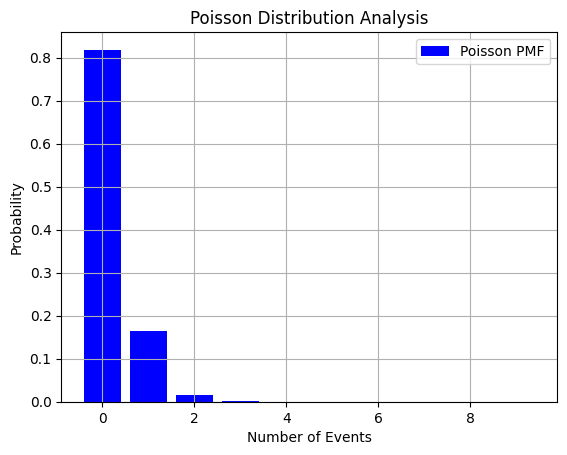

In [61]:

# Set the lambda parameter for the Poisson distribution
lambda_parameter = 0.2

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [64]:
print(f'The probability of fewer than 2 machines will be inoperative is {poisson.cdf(1,lambda_parameter):2f}')
print(f'The probability of the claim that 3 or more machines become inoperative in a single day is represented by p= {1-poisson.cdf(2,lambda_parameter):2f}')

The probability of fewer than 2 machines will be inoperative is 0.982477
The probability of the claim that 3 or more machines become inoperative in a single day is represented by p= 0.001148


#Q50

   X      P(X)
0  0  0.049787
1  1  0.149361
2  2  0.224042
3  3  0.224042
4  4  0.168031
5  5  0.100819
6  6  0.050409
7  7  0.021604
8  8  0.008102
9  9  0.002701


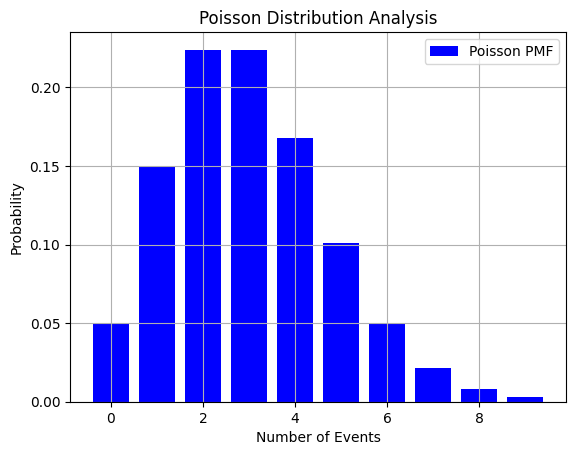

In [69]:

# Set the lambda parameter for the Poisson distribution
lambda_parameter = 3

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [70]:
print(f'The probability that 3 or more spacers are defective is {1-poisson.cdf(2,lambda_parameter):.2f}')

The probability that 3 or more spacers are defective is 0.58


#Q51

   X      P(X)
0  0  0.018316
1  1  0.073263
2  2  0.146525
3  3  0.195367
4  4  0.195367
5  5  0.156293
6  6  0.104196
7  7  0.059540
8  8  0.029770
9  9  0.013231


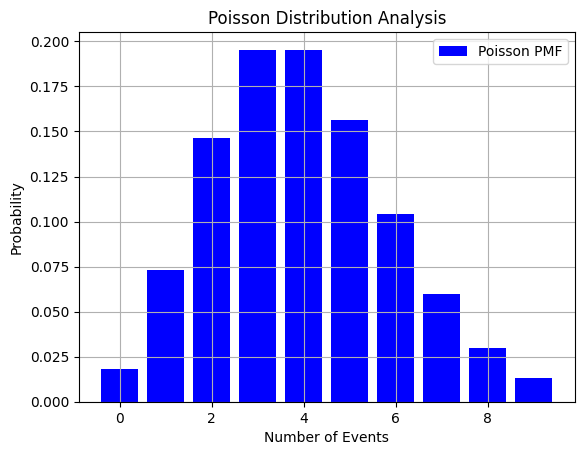

In [76]:

# Set the lambda parameter for the Poisson distribution
lambda_parameter = 4

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [74]:
print(f'The probability of 4 or fewer customers are waiting in line is {poisson.cdf(4,lambda_parameter):.2f}')
print(f'The probability of 4 or more customers are waiting in line is {1-poisson.cdf(3,lambda_parameter):.2f}')

The probability of 4 or fewer customers are waiting in line is 0.63
The probability of 4 or more customers are waiting in line is 0.57


#Q52

x	p(x)
---------------
0	0.20000
1	0.60000
2	0.20000
3	0.00000


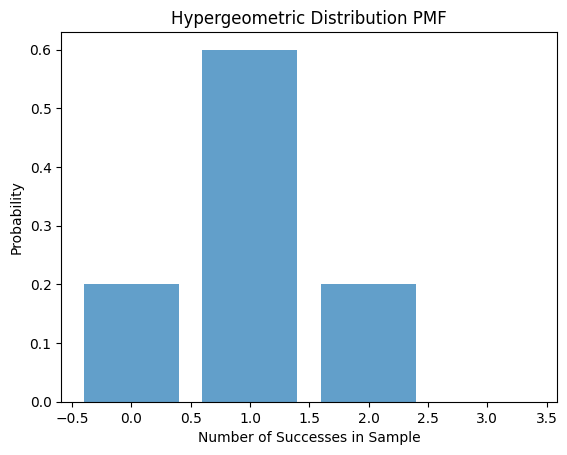

In [75]:
# Define parameters
N = 6  # Total number of items in the population
K = 2  # Total number of successes in the population
n = 3  # Number of items drawn in each trial

# Generate possible values for the number of successes in the sample
x = np.arange(0,n+1)

# Calculate the probability mass function (PMF)
pmf = hypergeom.pmf(x, N, K, n)

# Print the PMF
print("x\tp(x)")
print("-" * 15)
for i in range(len(x)):
    print(f"{x[i]}\t{pmf[i]:.5f}")

# Plot the PMF
plt.bar(x, pmf, align="center", alpha=0.7)
plt.xlabel("Number of Successes in Sample")
plt.ylabel("Probability")
plt.title("Hypergeometric Distribution PMF")
plt.show()


#Q53

   X      P(X)
0  0  0.049787
1  1  0.149361
2  2  0.224042
3  3  0.224042
4  4  0.168031
5  5  0.100819
6  6  0.050409
7  7  0.021604
8  8  0.008102
9  9  0.002701


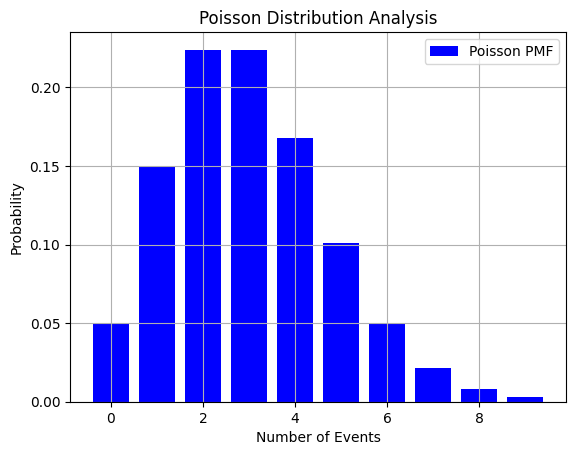

In [77]:

# Set the lambda parameter for the Poisson distribution
lambda_parameter = 3

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [79]:
p=1-poisson.cdf(0,lambda_parameter)
print(f'The probability of selling atleast 1 Lexus for 5 days straight is {p**5}')

The probability of selling atleast 1 Lexus for 5 days straight is 0.7746484970459232


#Q54

x	p(x)
---------------
0	0.07143
1	0.38095
2	0.42857
3	0.11429
4	0.00476


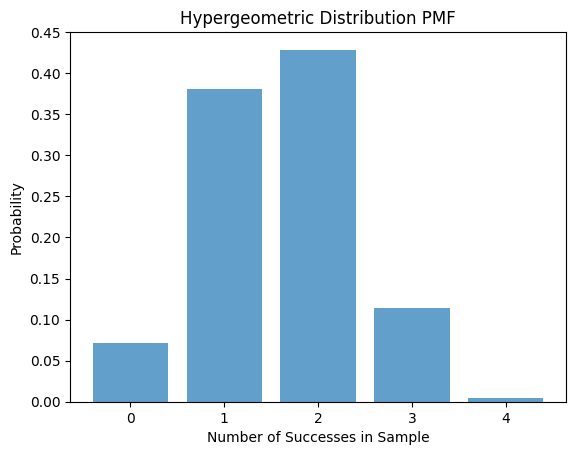

In [80]:
# Define parameters
N = 10  # Total number of items in the population
K = 4  # Total number of successes in the population
n = 4  # Number of items drawn in each trial

# Generate possible values for the number of successes in the sample
x = np.arange(0,n+1)

# Calculate the probability mass function (PMF)
pmf = hypergeom.pmf(x, N, K, n)

# Print the PMF
print("x\tp(x)")
print("-" * 15)
for i in range(len(x)):
    print(f"{x[i]}\t{pmf[i]:.5f}")

# Plot the PMF
plt.bar(x, pmf, align="center", alpha=0.7)
plt.xlabel("Number of Successes in Sample")
plt.ylabel("Probability")
plt.title("Hypergeometric Distribution PMF")
plt.show()


#Q55

x	p(x)
---------------
0	0.38300
1	0.45059
2	0.15020
3	0.01581
4	0.00040


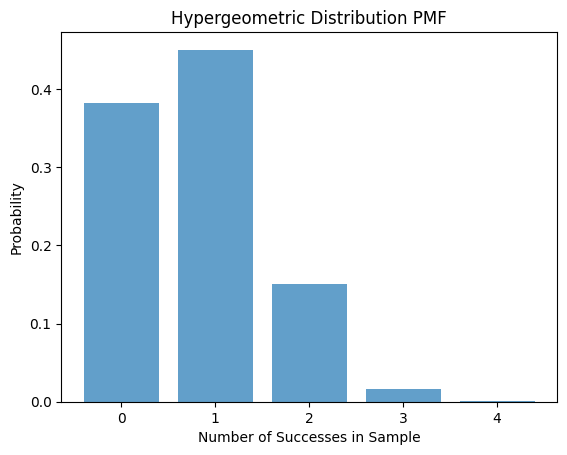

In [81]:
# Define parameters
N = 25  # Total number of items in the population
K = 5  # Total number of successes in the population
n = 4  # Number of items drawn in each trial

# Generate possible values for the number of successes in the sample
x = np.arange(0,n+1)

# Calculate the probability mass function (PMF)
pmf = hypergeom.pmf(x, N, K, n)

# Print the PMF
print("x\tp(x)")
print("-" * 15)
for i in range(len(x)):
    print(f"{x[i]}\t{pmf[i]:.5f}")

# Plot the PMF
plt.bar(x, pmf, align="center", alpha=0.7)
plt.xlabel("Number of Successes in Sample")
plt.ylabel("Probability")
plt.title("Hypergeometric Distribution PMF")
plt.show()


In [86]:
###### With replacement, we can use the binomial distribution

print(binom.pmf(1,4,0.2))
###### With replacement, we can use the binomial distribution
print(poisson.pmf(1,0.8))


0.4096000000000001
0.35946317129377725


#Q57

x	p(x)
---------------
0	0.15909
1	0.47727
2	0.31818
3	0.04545


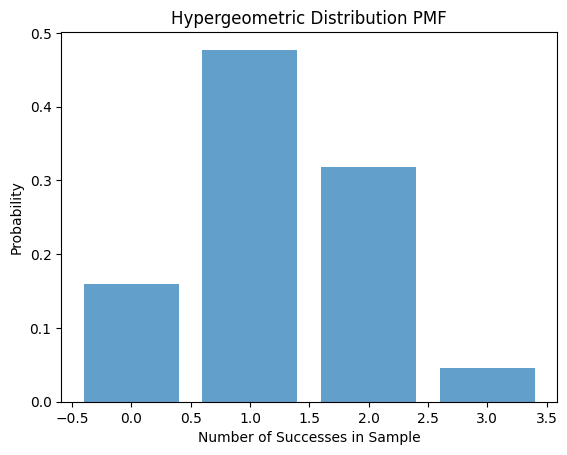

In [87]:
# Define parameters
N = 12  # Total number of items in the population
K = 5  # Total number of successes in the population
n = 3  # Number of items drawn in each trial

# Generate possible values for the number of successes in the sample
x = np.arange(0,n+1)

# Calculate the probability mass function (PMF)
pmf = hypergeom.pmf(x, N, K, n)

# Print the PMF
print("x\tp(x)")
print("-" * 15)
for i in range(len(x)):
    print(f"{x[i]}\t{pmf[i]:.5f}")

# Plot the PMF
plt.bar(x, pmf, align="center", alpha=0.7)
plt.xlabel("Number of Successes in Sample")
plt.ylabel("Probability")
plt.title("Hypergeometric Distribution PMF")
plt.show()


In [88]:
print(f'The probability that the traveller will be arrested is represented by {1-hypergeom.cdf(0, N, K, n)}')

The probability that the traveller will be arrested is represented by 0.8409090909090908


#Q58

In [97]:
df = pd.DataFrame({'Coins':[0.05,0.10,0.25,0.50],'Number':[10,10,15,15]})
df['P(X)'] = df['Number']/np.sum(df['Number'])
print(df)
mean = np.sum(df['P(X)']*df['Coins'])
print(f'Mean payoff {mean}')
print(f'Variance:{np.sum(df['P(X)']*(df['Coins']-mean)**2)}')

   Coins  Number  P(X)
0   0.05      10   0.2
1   0.10      10   0.2
2   0.25      15   0.3
3   0.50      15   0.3
Mean payoff 0.255
Variance:0.031225000000000003


#Q59

   X          P(X)
0  0  4.895417e-01
1  1  3.496726e-01
2  2  1.248831e-01
3  3  2.973407e-02
4  4  5.309655e-03
5  5  7.585221e-04
6  6  9.030025e-05
7  7  9.214311e-06
8  8  8.227063e-07
9  9  6.529415e-08


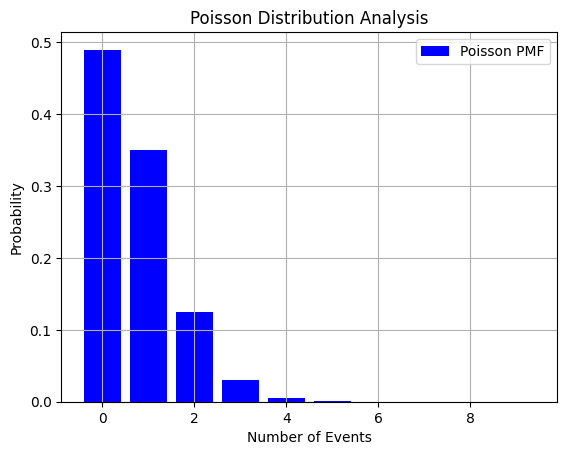

In [98]:
#First estimate
# Set the lambda parameter for the Poisson distribution
lambda_parameter = (1/35)*25

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


   X          P(X)
0  0  9.995834e-01
1  1  4.164931e-04
2  2  8.676939e-08
3  3  1.205130e-11
4  4  1.255344e-15
5  5  1.046120e-19
6  6  7.264724e-24
7  7  4.324240e-28
8  8  2.252208e-32
9  9  1.042689e-36


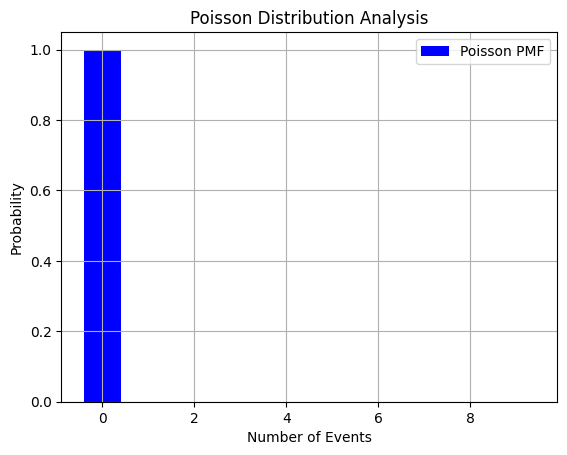

In [99]:
#second estimate
# Set the lambda parameter for the Poisson distribution
lambda_parameter = (1/60000)*25

# Calculate the probability mass function (PMF) for the Poisson distribution
x_values = np.arange(0, 10)
pmf_values = poisson.pmf(x_values, lambda_parameter)
print(pd.DataFrame({'X':x_values,'P(X)':pmf_values}))

# Plot the PMF of the Poisson distribution
plt.bar(x_values, pmf_values,linestyle='-', label='Poisson PMF', color='blue')

# Add labels and legend
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


#Q60


Mean: 0.8529411764705882
Variance: 0.12543252595155713
   k      P(k)
0  0  0.147059
1  1  0.852941


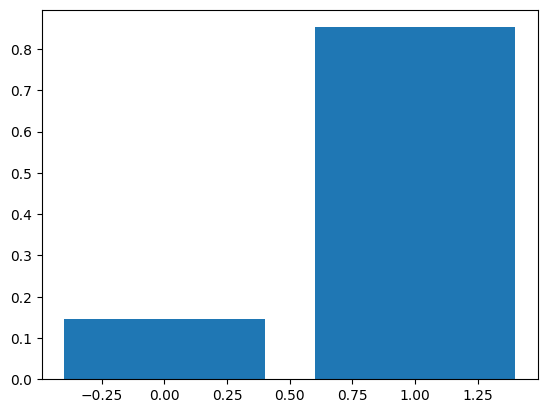

In [106]:
# Parameters
n = 1  # Number of trials
p = 29/34  # Probability of success

# Calculate the first few probabilities
k_values = np.arange(0, n+1)  # Values of k from 0 to 10
probabilities = [binom.pmf(i, n, p) for i in k_values]

mean = n * p
variance = n * p * (1 - p)

print("\nMean:", mean)
print("Variance:", variance)

df = pd.DataFrame({'k':k_values,'P(k)':probabilities})
print(df)
# Generate the range of values for the x-axis (number of successes)
x = np.arange(0, n+1)

# Calculate the CDF for each value
cdf = binom.cdf(x, n, p)

plt.bar(df['k'],df['P(k)'])
plt.show()





Mean: 3.5999999999999996
Variance: 2.5199999999999996
     k          P(k)        cumsum
0    0  1.384129e-02  9.861587e-01
1    1  7.118376e-02  9.149750e-01
2    2  1.677903e-01  7.471847e-01
3    3  2.397004e-01  5.074842e-01
4    4  2.311397e-01  2.763445e-01
5    5  1.584958e-01  1.178487e-01
6    6  7.924790e-02  3.860084e-02
7    7  2.911147e-02  9.489371e-03
8    8  7.797716e-03  1.691655e-03
9    9  1.485279e-03  2.063763e-04
10  10  1.909645e-04  1.541179e-05
11  11  1.488035e-05  5.314410e-07
12  12  5.314410e-07  3.330669e-16


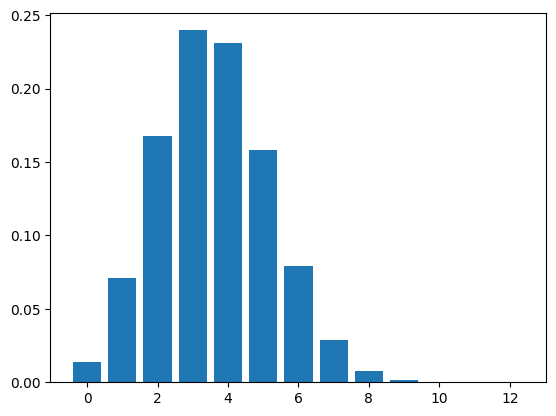

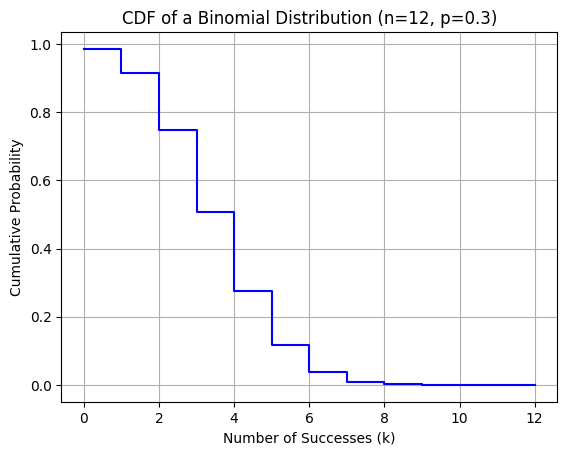

In [107]:
# Parameters
n = 12  # Number of trials
p = 0.3  # Probability of success

# Calculate the first few probabilities
k_values = np.arange(0, n+1)  # Values of k from 0 to 10
probabilities = [binom.pmf(i, n, p) for i in k_values]

mean = n * p
variance = n * p * (1 - p)

print("\nMean:", mean)
print("Variance:", variance)

df = pd.DataFrame({'k':k_values,'P(k)':probabilities})
df['cumsum'] = 1-df['P(k)'].cumsum()
print(df)
# Generate the range of values for the x-axis (number of successes)
x = np.arange(0, n+1)

# Calculate the CDF for each value
cdf = binom.cdf(x, n, p)

plt.bar(df['k'],df['P(k)'])
plt.show()
# Plot the more than CDF
plt.step(x, df['cumsum'], where='post', color='b')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of a Binomial Distribution (n={}, p={})'.format(n, p))
plt.grid(True)
plt.show()



In [108]:
print('The probability of atleast 5 getting the flu',1-binom.cdf(4,n,p))

The probability of atleast 5 getting the flu 0.27634453046999985


x	p(x)
---------------
0	0.00000
1	0.01010
2	0.14141
3	0.42424
4	0.35354
5	0.07071


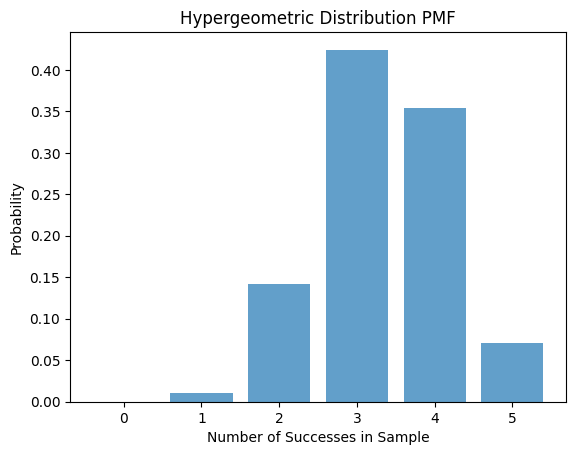

In [109]:
# Define parameters
N = 12  # Total number of items in the population
K = 8  # Total number of successes in the population
n = 5  # Number of items drawn in each trial

# Generate possible values for the number of successes in the sample
x = np.arange(0,n+1)

# Calculate the probability mass function (PMF)
pmf = hypergeom.pmf(x, N, K, n)

# Print the PMF
print("x\tp(x)")
print("-" * 15)
for i in range(len(x)):
    print(f"{x[i]}\t{pmf[i]:.5f}")

# Plot the PMF
plt.bar(x, pmf, align="center", alpha=0.7)
plt.xlabel("Number of Successes in Sample")
plt.ylabel("Probability")
plt.title("Hypergeometric Distribution PMF")
plt.show()



Mean: 1.0
Variance: 0.995
       k      P(k)        cumsum
0      0  0.366958  6.330422e-01
1      1  0.368802  2.642403e-01
2      2  0.184401  7.983943e-02
3      3  0.061158  1.868134e-02
4      4  0.015136  3.545480e-03
..   ...       ...           ...
196  196  0.000000  2.220446e-16
197  197  0.000000  2.220446e-16
198  198  0.000000  2.220446e-16
199  199  0.000000  2.220446e-16
200  200  0.000000  2.220446e-16

[201 rows x 3 columns]


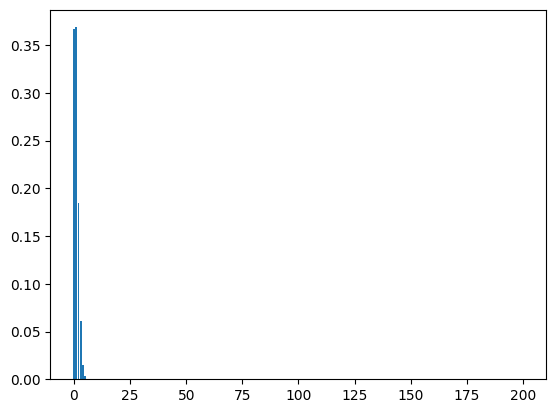

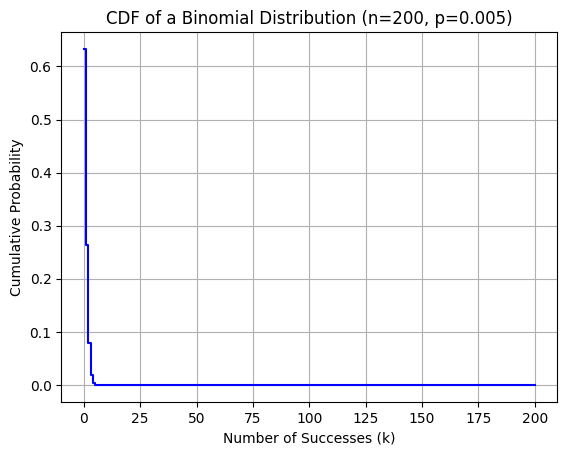

In [110]:
# Parameters
n = 200  # Number of trials
p = 0.005 # Probability of success

# Calculate the first few probabilities
k_values = np.arange(0, n+1)  # Values of k from 0 to 10
probabilities = [binom.pmf(i, n, p) for i in k_values]

mean = n * p
variance = n * p * (1 - p)

print("\nMean:", mean)
print("Variance:", variance)

df = pd.DataFrame({'k':k_values,'P(k)':probabilities})
df['cumsum'] = 1-df['P(k)'].cumsum()
print(df)
# Generate the range of values for the x-axis (number of successes)
x = np.arange(0, n+1)

# Calculate the CDF for each value
cdf = binom.cdf(x, n, p)

plt.bar(df['k'],df['P(k)'])
plt.show()
# Plot the more than CDF
plt.step(x, df['cumsum'], where='post', color='b')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of a Binomial Distribution (n={}, p={})'.format(n, p))
plt.grid(True)
plt.show()



In [111]:
print(f'probability of finding atleast on millionaire in the group is {1-binom.pmf(0,n,p)}')

probability of finding atleast on millionaire in the group is 0.6330421782738327
